In [89]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
from shapely.geometry import Point, Polygon
import numpy as np
import pickle
from shapely.geometry import MultiPolygon
from shapely.ops import unary_union

In [236]:
barcelona_gdf = gpd.read_file('bcn_shapefile/Término Municipal Barcelona/0301040100_Terme_Municipal_ADM_ETRS89.shp')
barcelona_gdf

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010411,Terme Municipal,01041101,Terme Municipal,0104110101,LÃ­mit de terme municipal,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((432115.848 4590999.098, 432119..."


/var/folders/s6/mk2s7pw566scpy9qwxvtscsm0000gn/T/ipykernel_38098/3218509521.py:7: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if row['geometry'].type == 'MultiPolygon':


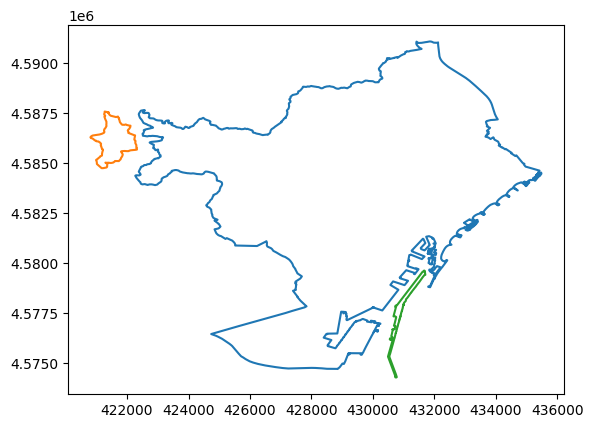

In [237]:

# Plotting the identified polygon(s) that contain Barcelona city
for idx, row in barcelona_gdf.iterrows():
    # if row['geometry'].type == 'Polygon':
    #     # For POLYGON, extract the exterior boundary using the 'boundary' attribute
    #     x, y = row['geometry'].boundary.xy
    #     #plt.plot(x, y)
    if row['geometry'].type == 'MultiPolygon':
        # For MULTIPOLYGON, extract the exterior boundary of each component using the 'exterior' attribute
        for polygon in row['geometry'].geoms:
            x, y = polygon.exterior.xy
            plt.plot(x, y)

# Add any additional plotting options or labels as needed
plt.show()

POLYGON ((432115.8476 4590999.0976, 432119.4299999997 4590931.263, 432124.46999999974 4590840.204, 432139.1679999996 4590639.482999999, 432144.58999999985 4590563.452, 432158.41199999955 4590378.464, 432158.51609999966 4590377.238399999, 432158.9040000001 4590372.671, 432161.5159999998 4590341.918, 432164.30900000036 4590321.436000001, 432170.7450000001 4590287.215, 432176.7929999996 4590261.534, 432183.90199999977 4590234.07, 432191.5700000003 4590208.048, 432203.16899999976 4590173.967, 432213.7419999996 4590146.380999999, 432224.449 4590121.011, 432236.68599999975 4590094.927999999, 432255.20999999996 4590059.569, 432269.9840000002 4590034.124, 432298.87600000016 4589989.43, 432333.61899999995 4589942.514, 432363.4670000002 4589903.943, 432402.12200000044 4589854.619999999, 432430.1370000001 4589821.708000001, 432459.5389999999 4589789.468, 432492.16000000015 4589756.252, 432543.6880000001 4589705.811000001, 432665.5499999998 4589587.022, 432723.98000000045 4589529.85, 432739.256599

/var/folders/s6/mk2s7pw566scpy9qwxvtscsm0000gn/T/ipykernel_38098/1305446561.py:5: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if row['geometry'].type == 'MultiPolygon':


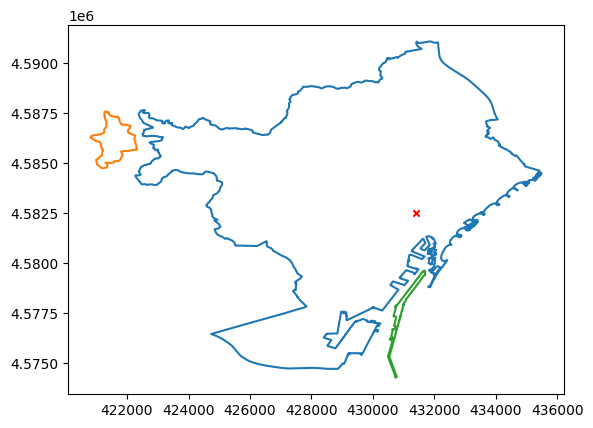

In [263]:
barcelonaCenter = Point(431392.7938999999, 4582517.4902)
bcnPoly = None

for idx, row in barcelona_gdf.iterrows():
    if row['geometry'].type == 'MultiPolygon':
        for polygon in row['geometry'].geoms:
            print(polygon)
            x, y = polygon.exterior.xy
            plt.plot(x, y)
            if barcelonaCenter.within(polygon):
                 bcnPoly = np.array([(xi, yi) for xi, yi in zip(x,y)])
                 print('Barcelona City')


plt.scatter([431392.7938999999], [4582517.4902], c='r', marker='x', s=20)
plt.show()


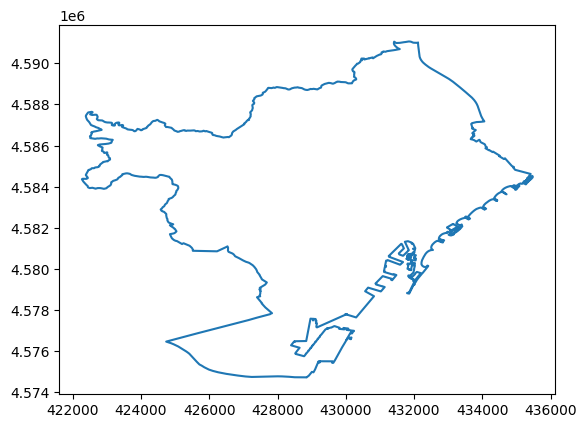

array([[ 432115.8476, 4590999.0976],
       [ 432119.43  , 4590931.263 ],
       [ 432124.47  , 4590840.204 ],
       ...,
       [ 432005.4718, 4591005.0445],
       [ 432010.8488, 4591004.6125],
       [ 432115.8476, 4590999.0976]])

In [265]:
plt.plot(bcnPoly[:,0],bcnPoly[:,1])
plt.show()
bcnPoly

In [267]:
import numpy as np
import pyproj

#Convert to a normal Geographic coordinates

# Define the UTM projection for zone 31N (covers Barcelona)
utm_zone = 31
utm_proj = pyproj.Proj(proj='utm', zone=utm_zone, ellps='WGS84')


# Perform the transformation to geographic coordinates (longitude, latitude)
lon_lat_coords = np.array(utm_proj(bcnPoly[:, 0], bcnPoly[:, 1], inverse=True)).T

lon_lat_coords
      

array([[ 2.1870605 , 41.46771682],
       [ 2.18711103, 41.46710616],
       [ 2.18718162, 41.46628646],
       ...,
       [ 2.18573816, 41.46776103],
       [ 2.1858026 , 41.4677576 ],
       [ 2.1870605 , 41.46771682]])

In [269]:
# Create an empty list to store the modified lists
lat_long_coords= []

# Loop through each list in the original array
for lst in lon_lat_coords:
    # Switch the order of elements in each list
    modified_coord = [lst[1], lst[0]]
    # Append the modified list to the new list
    lat_long_coords.append(modified_coord)

# Convert the modified list back to a NumPy array
lat_long_coords_array = np.array(lat_long_coords)

lat_long_coords_array

array([[41.46771682,  2.1870605 ],
       [41.46710616,  2.18711103],
       [41.46628646,  2.18718162],
       ...,
       [41.46776103,  2.18573816],
       [41.4677576 ,  2.1858026 ],
       [41.46771682,  2.1870605 ]])

In [270]:
pickle.dump(lat_long_coords_array,open("bcnPoly_lat_long.pkl","wb"))

## Polygo split
Code to create mesh and split BCN mainland polygon into smaller grids

In [272]:
import shapely
import gmaps
from shapely.geometry import Point, Polygon, box
from matplotlib import pyplot as plt
import numpy as np
import pickle

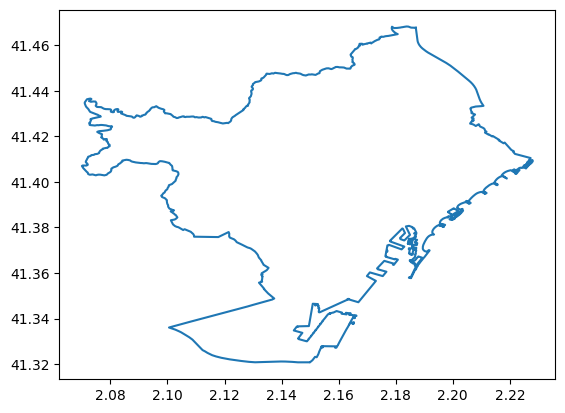

In [273]:
BCNPoly = pickle.load(open("bcnPoly_lat_long.pkl",'rb'))
BCNPoly = Polygon(np.flip(BCNPoly))
x,y = BCNPoly.exterior.xy
plt.plot(x,y)

Code to create the mesh of grids used to split the map

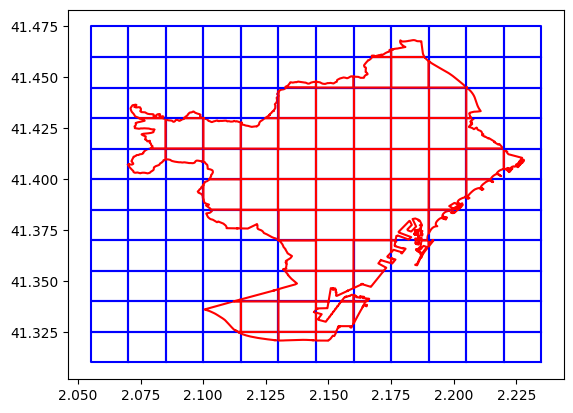

In [286]:
dim = 0.015
bounds = BCNPoly.bounds
xmin = int(bounds[0] // dim)
xmax = int(bounds[2] // dim)
ymin = int(bounds[1] // dim)
ymax = int(bounds[3] // dim)
for i in range(xmin, xmax+1):
    for j in range(ymin, ymax+1):
        b = box(i*dim, j*dim, (i+1)*dim, (j+1)*dim)
        g = BCNPoly.intersection(b)
        x,y = b.exterior.xy
        plt.plot(x,y,c='b')
        if g.is_empty:
            continue
        if type(g)==shapely.geometry.multipolygon.MultiPolygon:
            for gems in g.geoms:
                x,y = gems.exterior.xy
                plt.plot(x,y,c='r')
        else:
            x,y = g.exterior.xy
            plt.plot(x,y,c='r')
plt.show()

In [289]:
def partition(polygon, dim, mergeFactor=0.1):
    '''
    polygon: Unsplit polygon of mainland US
    dim: The dimensions of each grid to split the map into
    mergeFactor: threshold of smallest grid. 
    Any grid smaller will be combined with neighbouring grids
    '''
    bounds = polygon.bounds
    xmin = int(bounds[0] // dim)
    xmax = int(bounds[2] // dim)
    ymin = int(bounds[1] // dim)
    ymax = int(bounds[3] // dim)
    grid = 0
    res = []
    for i in range(xmin, xmax+1):
        for j in range(ymin, ymax+1):
            b = box(i*dim, j*dim, (i+1)*dim, (j+1)*dim)
            g = polygon.intersection(b)
            if g.is_empty:
                continue
            if type(g)==shapely.geometry.multipolygon.MultiPolygon:
                for gems in g.geoms:
                    res.append(gems)
                    grid += 1
            else:
                res.append(g)
                grid += 1
    return merge(res, mergeFactor)

def merge(polyList, mergeFactor=0.1):
    '''
    polyList: list of polygon grids the map is split into
    mergeFactor: threshold of smallest grid. 
    Any grid smaller will be combined with neighbouring grids
    '''
    def combine(pidx, polyL):
        p = polyL[pidx]
        del polyL[pidx]
        for idx,i in enumerate(polyL):
            u = p.union(i)
            if p.intersects(i) and type(u)!=shapely.geometry.multipolygon.MultiPolygon:
                polyL[idx] = u
                break
        return polyL
    
    mnLimit = max(polyList, key=lambda x:x.area).area * mergeFactor
    mnPoly = min(polyList, key=lambda x:x.area)
    while(mnPoly.area<=mnLimit):
        polyList = combine(polyList.index(mnPoly), polyList)
        mnPoly = min(polyList, key=lambda x:x.area)
        
    result = {}
    for idx,i in enumerate(polyList):
        x,y = i.exterior.xy
        result[idx] = np.array([(y,x) for x,y in zip(x,y)])
    return result

def plotMap(polyGrid):
    gPoly = []
    gMarkLoc = []
    gMarkInf = []
    info_box_template = """
    <dl>
    <dd>{}</dd>
    </dl>
    """
    for k,v in polyGrid.items():
        gPoly.append(gmaps.Polygon(
                        list(v),
                        stroke_color='red',
                        fill_color='blue'
                        ))
        gMarkLoc.append((v[0][0],v[0][1]))
        gMarkInf.append(info_box_template.format(k))
    fig = gmaps.figure(center=(39.50,-98.35), zoom_level=4, map_type='TERRAIN')
    fig.add_layer(gmaps.drawing_layer(features=gPoly))
#     fig.add_layer(gmaps.marker_layer(gMarkLoc, info_box_content=gMarkInf))
    return fig



In [401]:
BcnPolyGrid = partition(BCNPoly, 0.015, mergeFactor=0.2)

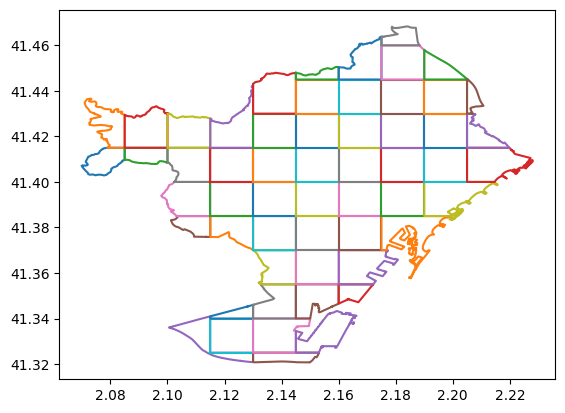

56

In [402]:
for i in BcnPolyGrid.values():
    plt.plot(i[:,1],i[:,0])
plt.show()
len(BcnPolyGrid)

In [404]:

# Initialize variables to keep track of the minimum length and the corresponding arrays
min_length = float('inf')  # Set to a very large number initially
min_length_arrays = []
counter = 0

# Iterate through the dictionary and find the minimum length and arrays
for key, array in BcnPolyGrid.items():
    array_length = len(array)
    if array_length < min_length:
        min_length = array_length
        min_length_arrays = [array]  # Reset the array list since we found a new minimum
        counter = 1
    elif array_length == min_length:
        min_length_arrays.append(array)
        counter += 1

print(f"The arrays with the minimum length are:")
for i, arr in enumerate(min_length_arrays):
    print(f"Array {i + 1}: {arr}")

print(f"The length of the minimum arrays is: {min_length}")
print(f"Total arrays with minimum length: {counter}")

The arrays with the minimum length are:
Array 1: [[41.325  2.115]
 [41.34   2.115]
 [41.34   2.13 ]
 [41.325  2.13 ]
 [41.325  2.115]]
Array 2: [[41.385  2.115]
 [41.4    2.115]
 [41.4    2.13 ]
 [41.385  2.13 ]
 [41.385  2.115]]
Array 3: [[41.4    2.115]
 [41.415  2.115]
 [41.415  2.13 ]
 [41.4    2.13 ]
 [41.4    2.115]]
Array 4: [[41.385  2.13 ]
 [41.4    2.13 ]
 [41.4    2.145]
 [41.385  2.145]
 [41.385  2.13 ]]
Array 5: [[41.4    2.13 ]
 [41.415  2.13 ]
 [41.415  2.145]
 [41.4    2.145]
 [41.4    2.13 ]]
Array 6: [[41.415  2.13 ]
 [41.43   2.13 ]
 [41.43   2.145]
 [41.415  2.145]
 [41.415  2.13 ]]
Array 7: [[41.355  2.145]
 [41.37   2.145]
 [41.37   2.16 ]
 [41.355  2.16 ]
 [41.355  2.145]]
Array 8: [[41.37   2.145]
 [41.385  2.145]
 [41.385  2.16 ]
 [41.37   2.16 ]
 [41.37   2.145]]
Array 9: [[41.385  2.145]
 [41.4    2.145]
 [41.4    2.16 ]
 [41.385  2.16 ]
 [41.385  2.145]]
Array 10: [[41.4    2.145]
 [41.415  2.145]
 [41.415  2.16 ]
 [41.4    2.16 ]
 [41.4    2.145]]
Array 11:

In [405]:
pickle.dump(BcnPolyGrid,open("BcnPolyGrid.pkl","wb"))

In [415]:
BcnPolyGrid[33]

array([[41.35496798,  2.1720423 ],
       [41.35418496,  2.17152731],
       [41.35327142,  2.17092953],
       [41.35280863,  2.17062331],
       [41.34896094,  2.16810071],
       [41.34869918,  2.16792546],
       [41.3482097 ,  2.16760842],
       [41.3478709 ,  2.16738594],
       [41.34749288,  2.16713359],
       [41.34714392,  2.16690655],
       [41.34839562,  2.16356276],
       [41.34850445,  2.16363463],
       [41.34848981,  2.16367366],
       [41.3485209 ,  2.16369636],
       [41.34864124,  2.16337782],
       [41.34845131,  2.1630412 ],
       [41.34842226,  2.1630698 ],
       [41.34846432,  2.163143  ],
       [41.34836925,  2.16323921],
       [41.34816239,  2.16287924],
       [41.3479471 ,  2.16250002],
       [41.34738006,  2.1614939 ],
       [41.34676168,  2.16040629],
       [41.34653095,  2.16      ],
       [41.355     ,  2.16      ],
       [41.355     ,  2.17206324],
       [41.35496798,  2.1720423 ]])